# CS231n

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 神经网络

神经网络的任务是找到一个未知函数的近似表达方式，它是由彼此相连的神经元所组成，这些神经元会在训练网络的过程中根据误差来更改它们的权重和偏置。

## 手动实现神经网络
### 使用 softmax 分类器

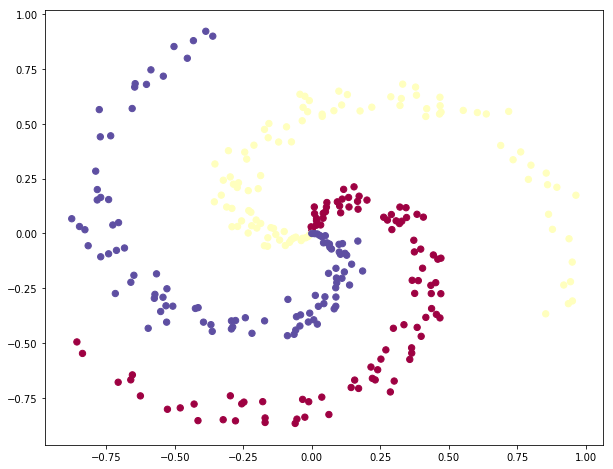

In [8]:
# 每个类别的数据量，数据的维度，类别个数
N = 100
D = 2
K = 3

# 生成数据矩阵，每一行第一个样本，两列；类别标签
X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = range(N*j, N*(j+1))
    # 弧度
    r = np.linspace(0.0, 1, N)
    # θ
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
# 可视化
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [9]:
# 初始化参数
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1, K))

# 一些超参
step_size = 1e-0
# 正则化项
reg = 1e-3

In [7]:
# 梯度下降算法循环
num_examples = X.shape[0]
for i in range(200):
    
    # 计算分值,输出为：300×3
    scores = np.dot(X, W) + b

    # 获取非正规化的概率
    exp_scores = np.exp(scores)
    # 对每个样本得分正则化 [N x K]
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # 为正确的样本分配概率
    correct_logprobs = -np.log(probs[range(num_examples), y])
    
    # 数据项损失与正则项损失
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5 * reg * np.sum(W*W)
    loss = data_loss + reg_loss
    
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
    
    # 计算梯度项
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    # 向后传播
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    # 正则项梯度
    dW += reg*W
    
    # 执行参数更新
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.099799
iteration 10: loss 0.904295
iteration 20: loss 0.831587
iteration 30: loss 0.798444
iteration 40: loss 0.781093
iteration 50: loss 0.771147
iteration 60: loss 0.765081
iteration 70: loss 0.761214
iteration 80: loss 0.758667
iteration 90: loss 0.756946
iteration 100: loss 0.755760
iteration 110: loss 0.754930
iteration 120: loss 0.754341
iteration 130: loss 0.753919
iteration 140: loss 0.753615
iteration 150: loss 0.753392
iteration 160: loss 0.753230
iteration 170: loss 0.753110
iteration 180: loss 0.753022
iteration 190: loss 0.752956


In [8]:
# 评估精确度
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


(-1.8815237665073168, 1.8584762334926865)

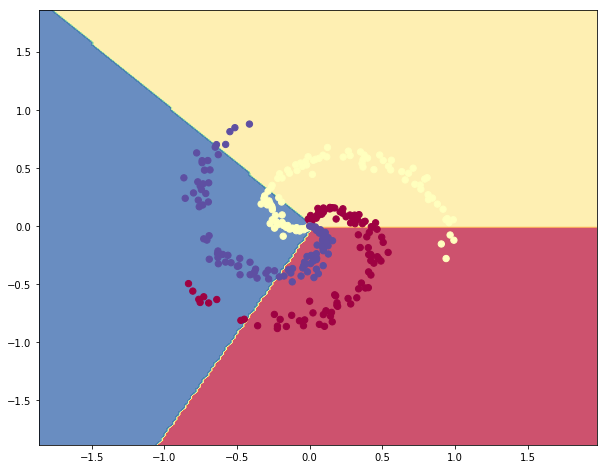

In [9]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### 使用神经网络

In [10]:
# 随机初始化参数
# 隐藏层神经元数量
h = 100
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# 步长与正则项
step_size = 1e-0
reg = 1e-3

In [12]:
num_examples = X.shape[0]
for i in range(10000):
    # 计算得分, 隐藏层使用 ReLU 计算，得到 [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    
    # 计算概率
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)# [N x K]
    
    # 计算损失
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5 * reg * np.sum(W*W) + 0.5 * reg * np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
        
    # 计算梯度，相当于计算出输出层的 δ
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # 首先传播到参数 W2 和 b2 ，此处相当于使用来计算 Loss Function 对权重的偏导 δ^(L)(a^(L-1))^T
    # Loss Function 对 bias 的导数就是 δ 即 dscores
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    # hidden_layer 本身也是其他参数 W 与数据 X 函数，因此需要继续传播到此变量
    # 此处相当于使用输出层的 δ 来计算隐藏层的 δ，使用的公式是 ((W^(l+1))^T δ^(l+1))
    dhidden = np.dot(dscores, W2.T)
    # 接下来传播到线性修复层，相当于对激活函数求导
    dhidden[hidden_layer <= 0] = 0

    # 最终传播到W，b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    
    # 添加正则项对梯度的贡献
    dW2 += reg * W2
    dW += reg * W
    
    # 执行参数更新
    W2 += -step_size * dW2
    b2 += -step_size * db2 
    W += -step_size * dW
    b += -step_size * db


iteration 0: loss 1.098683
iteration 1000: loss 0.275911
iteration 2000: loss 0.252912
iteration 3000: loss 0.249977
iteration 4000: loss 0.248944
iteration 5000: loss 0.248401
iteration 6000: loss 0.247797
iteration 7000: loss 0.247379
iteration 8000: loss 0.246946
iteration 9000: loss 0.246682


In [13]:
# 测试
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8815237665073168, 1.8584762334926865)

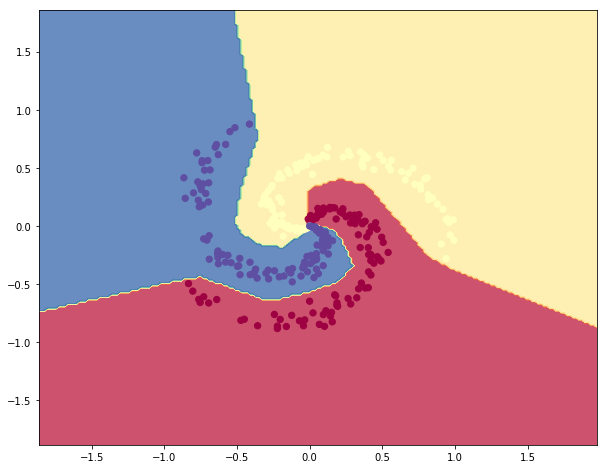

In [13]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

## 延伸文章
### 全连接转卷积

将 FC 连接层转成 Conv 层，这种不包含 CNN 的神经网络丝成为全卷积神经网络（FCN），可参考如下文章：
- [卷积层上的滑动窗口（将全连接层转化为卷积层）](https://blog.csdn.net/u010548772/article/details/78582250)
- [caffe学习笔记31-理解全连接层](https://blog.csdn.net/YiLiang_/article/details/60468530)

FCN的特点就在于输入和输出都是二维的图像，并且输入和输出具有相对应的空间结构，在这种情况下，我们可以将FCN的输出看作是一张热度图，用热度来指示待检测的目标的位置和覆盖的区域。在目标所处的区域内显示较高的热度，而在背景区域显示较低的热度，这也可以看成是对图像上的每一个像素点都进行了分类，这个点是否位于待检测的目标上。

### 空洞卷积（dilated convolution）及其接收视野（reception field）

使用空洞卷积可以在不改变原有卷积核大小的情况下，扩大接收视野且减少整体参数的数量，可以参考以下相关文章：
- [如何理解空洞卷积（dilated convolution）？](https://www.zhihu.com/question/54149221)

### 矩阵化运算

在进行卷积滑动窗口计算的时候，可以使用矩阵换操作来加速运算，缺点是矩阵中有较多的重复值，且需要的内存大大增加， im2col 可参考下面的文章：
- [卷积Im2Col](https://blog.csdn.net/u013498583/article/details/79414225)

### 迁移学习

- [一文看懂迁移学习：怎样用预训练模型搞定深度神经网络？](https://zhuanlan.zhihu.com/p/27657264)
- [Defining model in keras (include_top = True)](https://stackoverflow.com/questions/46036522/defining-model-in-keras-include-top-true)

In [5]:
A = np.random.randn(3,3)

In [6]:
np.dot(A, A.transpose())

array([[ 3.77052391,  0.44258342,  2.16925125],
       [ 0.44258342,  2.6469432 ,  1.88774055],
       [ 2.16925125,  1.88774055,  3.88929595]])

376320

In [10]:
a = np.array([[20,25,55],[30,80,67],[32,88,96]])
a

array([[20, 25, 55],
       [30, 80, 67],
       [32, 88, 96]])

In [14]:
s = np.sum(a)
s

493

In [15]:
a/s

array([[ 0.04056795,  0.05070994,  0.11156187],
       [ 0.06085193,  0.16227181,  0.13590264],
       [ 0.06490872,  0.17849899,  0.19472617]])

In [16]:
s2=np.sqrt(np.sum(a*a))
s2

183.91030422464098

In [17]:
a/s2

array([[ 0.10874866,  0.13593583,  0.29905883],
       [ 0.163123  ,  0.43499466,  0.36430803],
       [ 0.17399786,  0.47849412,  0.52199359]])

In [18]:
import os
import sys

In [45]:
s = open('/Users/weduoo/Desktop/2.txt','a')
with open('/Users/weduoo/Desktop/1.txt','r') as f:
    lines = f.readlines()
    for i in range(len(lines) - 2):
        if i%2 == 0:
            s.write(str(i//2 + 1) + '\n')
            time1 = '00:' + str(lines[i]).replace('\n','') + '.000'
            time2 = '00:' + str(lines[i + 2]).replace('\n','') + '.000'
            s.write(time1 + ' --> ' + time2)
            s.write('\n')
        else:
            s.write(str(lines[i]))
        if i%2 == 1:
            s.write('\n')

s.close()

In [34]:
4//3

1